<a href="https://colab.research.google.com/github/asmitaavni/github-upload/blob/main/IRIS_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset from seaborn library

In [3]:
iris=sns.load_dataset("iris")

In [4]:
# To get the number of rows and column data
print("Total No. of rows in the dataset is",iris.shape[0])
print("Total No. of columns in the dataset is",iris.shape[1])

Total No. of rows in the dataset is 150
Total No. of columns in the dataset is 5


In [6]:
#To get first few rows of the data set
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
# To get the information about each column and data type of each feature/column
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  146 non-null    float64
 1   sepal_width   146 non-null    float64
 2   petal_length  146 non-null    float64
 3   petal_width   146 non-null    float64
 4   species       146 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [8]:
# To get basic statistics of numerical/continous data column
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,146.000000,146.000000,146.000000,146.000000
mean,5.856849,3.040411,3.806849,1.220548
std,0.834093,0.397853,1.758042,0.759393
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


In [9]:
# To check, does data have any null
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
#Splitting data into Dependent and Independent Variables
X=iris.iloc[:,:-1].values
y=iris.iloc[:,-1].values

In [11]:
# to get average value of each column according to the dependent variable here it is species.
iris.groupby(["species"]).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,4.976596,3.376596,1.461702,0.246809
versicolor,5.955102,2.785714,4.275510,1.332653
virginica,6.588000,2.974000,5.552000,2.026000


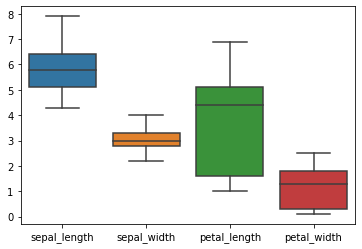

In [12]:
# to plot boxplot of numerical columns
sns.boxplot(data=iris)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


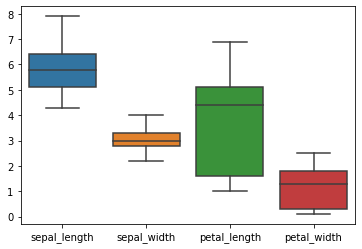

In [13]:
# removing outliers using Interquartile Range method
Q1=iris.quantile(0.25)
Q3=iris.quantile(0.75)
IQR=Q3-Q1
iris=iris[~((iris<(Q1-1.5*IQR)) | (iris>(Q3+1.5*IQR))).any(axis=1)]
sns.boxplot(data=iris)

In [14]:
# Splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.75,random_state=0)
X_test.shape

(37, 4)

**Supervised Learning**

**Logistic Regression**

In [15]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model
LR=LogisticRegression()
# fit the model with data
LR.fit(X_train, y_train)

y_pred=LR.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [16]:
# import the metrics class
from sklearn import metrics
cnf = metrics.confusion_matrix(y_test, y_pred)
cnf

array([[15,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  9]])

Text(0.5, 15.0, 'Predicted label')

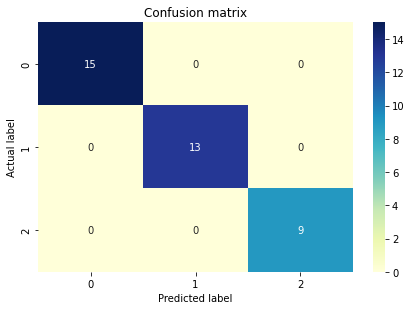

In [17]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=2)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [18]:
print("Accuracy of Logistic regression:",metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred,digits=2))

Accuracy of Logistic regression: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         9

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



**Decision Tree**

In [19]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred=DT.predict(X_test)

In [20]:
# import the metrics class
from sklearn import metrics
cnf = metrics.confusion_matrix(y_test, y_pred)
cnf

array([[15,  0,  0],
       [ 0, 11,  2],
       [ 0,  0,  9]])

In [21]:
# Model performance
print("Accuracy for decision tree algorithm:",metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred,digits=2))


Accuracy for decision tree algorithm: 0.9459459459459459
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.85      0.92        13
   virginica       0.82      1.00      0.90         9

    accuracy                           0.95        37
   macro avg       0.94      0.95      0.94        37
weighted avg       0.96      0.95      0.95        37



**Unsupervised Learning : Cluster Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


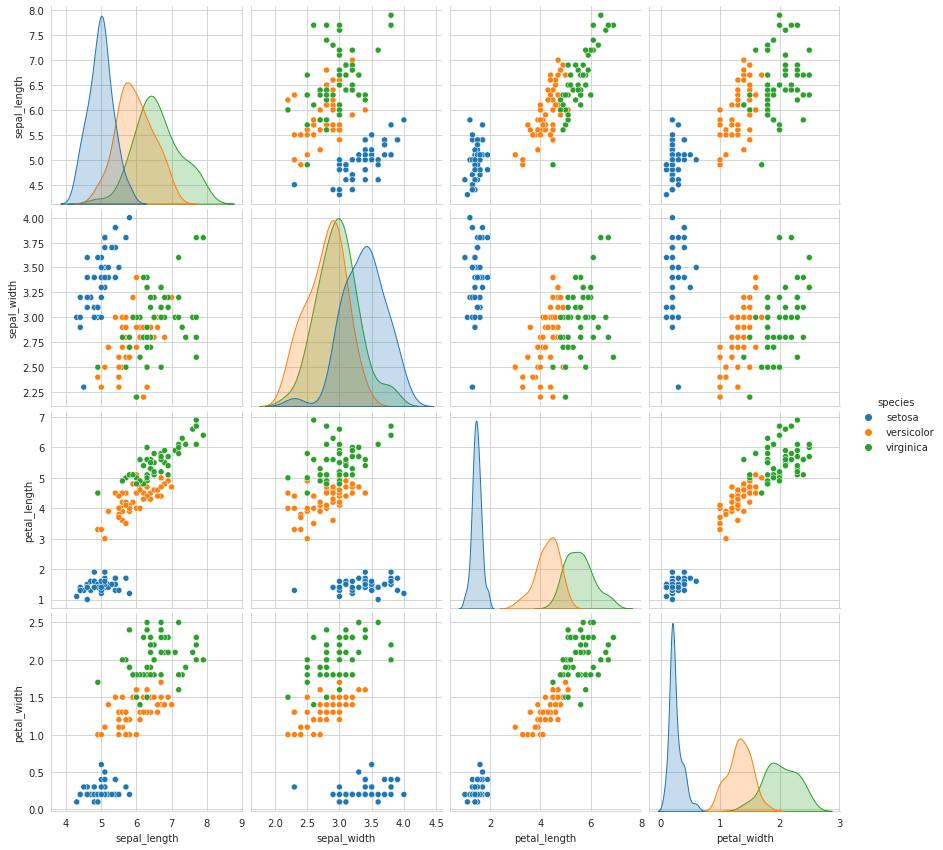

In [22]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",size=3);
plt.show()

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


To find no. of clusters to be selected
WCSS and Elbow Method

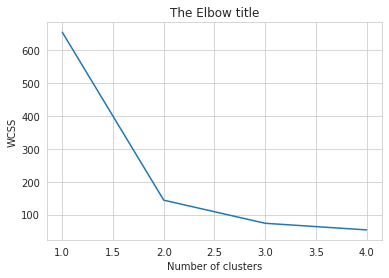

In [24]:
wcss=[]
for i in range(1,5):
  kmeans=KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

number_clusters=range(1,5)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

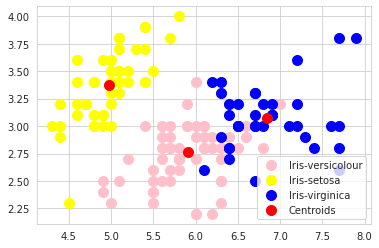

In [26]:
#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'pink', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In [27]:
km= [KMeans(n_clusters=k, random_state=42).fit(X) for k in range (2,11)]
s = [silhouette_score(X, model.labels_, metric='euclidean') for model in km[1:]]


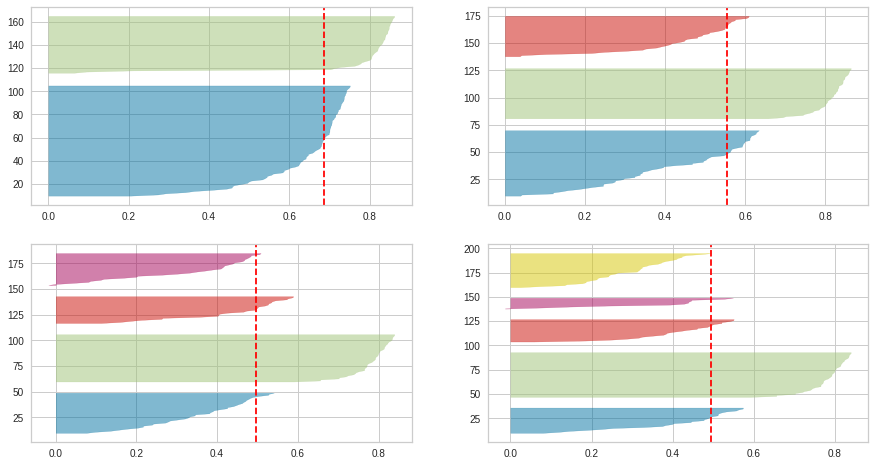

In [28]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    km_labels=km.fit_predict(X)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

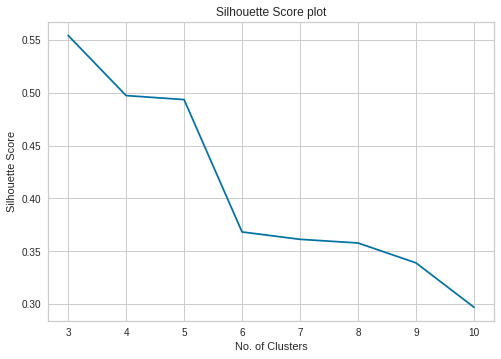

In [29]:
plt.plot(range(3,11),s)
plt.title('Silhouette Score plot')
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette Score')
plt.show()